In [1]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)

In [2]:
#load dataset
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
#target
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
#shape dataset
digits.data.shape

(1797, 64)

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Text(0.5, 1.0, 'array visualization')

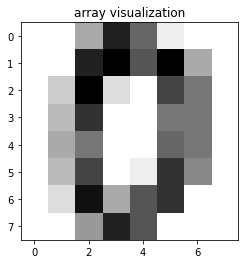

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0],cmap=plt.cm.gray_r,interpolation='nearest')
plt.title("array visualization")

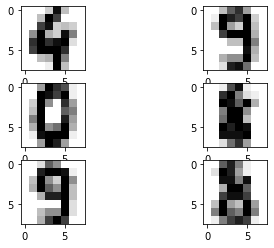

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(321)
plt.imshow(digits.images[1791],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795],cmap=plt.cm.gray_r,interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796],cmap=plt.cm.gray_r,interpolation='nearest')

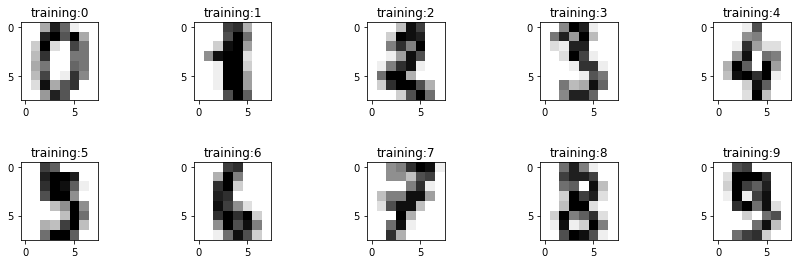

In [9]:
import numpy as np
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_lables=list(zip(digits.images,digits.target))

for index,(image,label) in enumerate(images_and_lables[:10]):
    plt.subplot(2,5,index+1)
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('training:%i' %label,fontsize=12)
    #save figure
    plt.savefig("plot1.png",dpi=300,bbox_inches='tight')

In [10]:
n=len(digits.images)
print(n)
data=digits.images.reshape((n,-1))

1797


In [11]:
digits.target.size

1797

In [12]:
n_samples=len(digits.images)
data=digits.images.reshape((n_samples,-1))

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.01, random_state=0)

In [14]:
 from sklearn import svm  
svc = svm.SVC(gamma=0.001, C=100.)

In [15]:
svc.fit(x_train, y_train)

SVC(C=100.0, gamma=0.001)

In [16]:
y_pred = svc.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

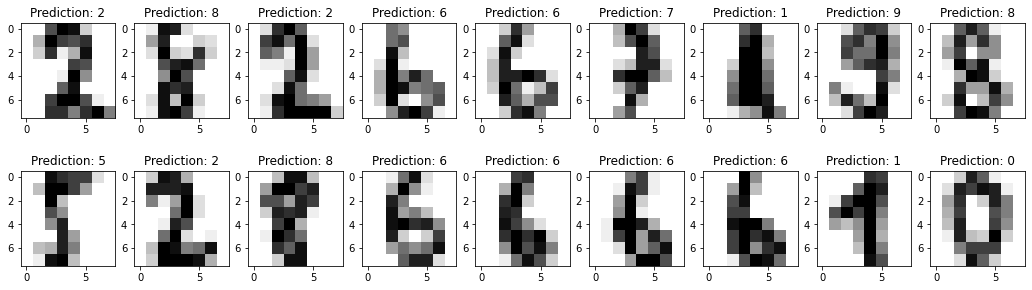

In [17]:
images_and_predictions = list(zip(x_test,y_pred))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:21]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

# save the figure
plt.savefig('plot3.png', dpi=400, bbox_inches='tight')

In [18]:
score = svc.score(x_test, y_test)
print('Accuracy : {0}'.format(score))

Accuracy : 1.0


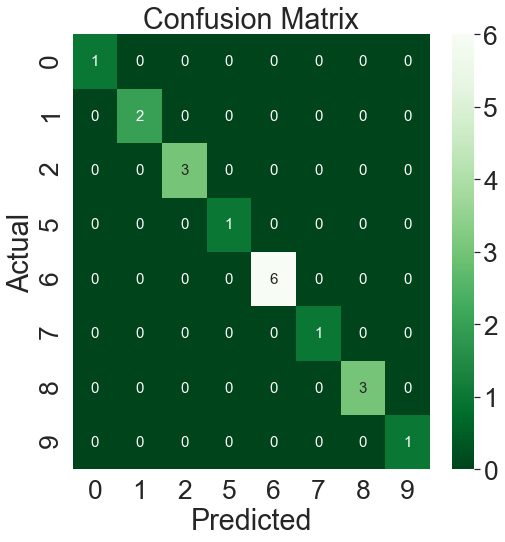

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (8,8))
sn.set(font_scale=2.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 15},cmap="Greens_r")
plt.savefig('plot4.png',dpi=200,bbox_inches='tight')

In [20]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print("classification report for svm classifier:\n",cr)

classification report for svm classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.9, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

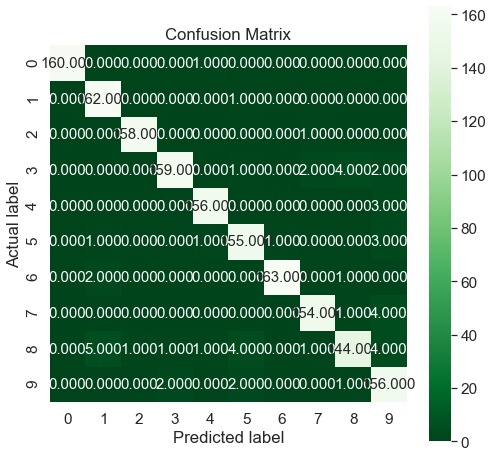

In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual label'
df_cm.columns.name = 'Predicted label'

plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 15},cmap="Greens_r",square="True",fmt=".3f")# font size
plt.savefig('plot5.png', dpi=100, bbox_inches='tight')

In [23]:
score = svc.score(x_test, y_test)
print('Accuracy : {0}'.format(score))

Accuracy : 0.9684796044499382


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.7, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

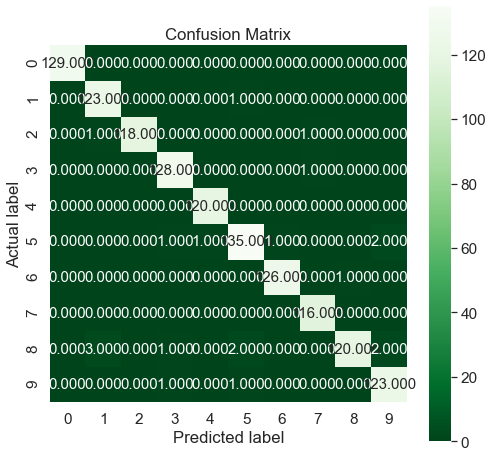

In [25]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual label'
df_cm.columns.name = 'Predicted label'

plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 15},cmap="Greens_r",square="True",fmt=".3f")# font size
plt.savefig('plot6.png', dpi=100, bbox_inches='tight')

In [26]:
score = svc.score(x_test, y_test)
print('Accuracy : {0}'.format(score))

Accuracy : 0.9841017488076311


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

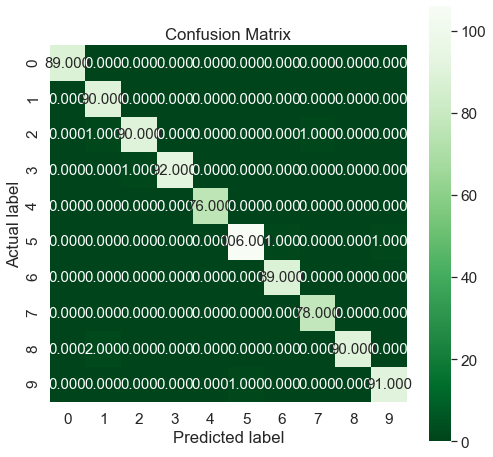

In [28]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual label'
df_cm.columns.name = 'Predicted label'

plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 15},cmap="Greens_r",square="True",fmt=".3f")# font size
plt.savefig('plot7.png', dpi=100, bbox_inches='tight')

In [29]:
score = svc.score(x_test, y_test)
print('Accuracy : {0}'.format(score))

Accuracy : 0.9911012235817576
